# import

In [1]:
import numpy as np
import pandas as pd
from os.path import join as pjoin
from matplotlib import pyplot as plt
from cxy_visual_dev.lib.predefine import proj_dir

anal_dir = pjoin(proj_dir, 'analysis')
work_dir = pjoin(anal_dir, 'plot/plot_dev_line')

# plot_column_by_index

In [3]:
def plot_column_by_index(data_file, columns, n_row, n_col, ylabel=None,
                         title=None, figsize=None, legend=True, out_file=None):
    """
    index就是年龄
    """
    if isinstance(data_file, str):
        df = pd.read_csv(data_file, index_col=0)
    elif isinstance(data_file, list):
        df1s = []
        for f1 in data_file:
            # 纵向连接所有f1
            if isinstance(f1, str):
                df1s.append(pd.read_csv(f1, index_col=0))
            elif isinstance(f1, list):
                df2s = []
                for f2 in f1:
                    # 横向连接所有f2
                    df2s.append(pd.read_csv(f2, index_col=0))
                df1s.append(
                    pd.concat(df2s, axis='columns', join='outer', ignore_index=False)
                )
            else:
                raise TypeError(2)
        df = pd.concat(df1s, axis='index', join='outer', ignore_index=False)
    else:
        raise TypeError(1)

    if columns == 'all':
        columns = df.columns
    ages = np.array(df.index)

    _, axes = plt.subplots(n_row, n_col, figsize=figsize)
    if n_row == 1 and n_col == 1:
        axes = np.array([[axes]])
    elif axes.shape != (n_row, n_col):
        axes = axes.reshape((n_row, n_col))
    max_row_idx = int((len(columns)-1) / n_col)
    for i, col in enumerate(columns):
        row_idx = int(i / n_col)
        col_idx = i % n_col
        ax = axes[row_idx, col_idx]
        meas_vec = np.array(df[col])
        ax.errorbar(ages, meas_vec, label=col)
        if col_idx == 0 and ylabel is not None:
            ax.set_ylabel(ylabel)
        if row_idx == max_row_idx:
            ax.set_xlabel('age in years')
        if row_idx == 0 and title is not None:
            ax.set_title(title)
        if legend:
            ax.legend()
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
    plt.tight_layout()
    if out_file is None:
        plt.show()
    else:
        plt.savefig(out_file)

## thickness age-map map-corr s1200 avg

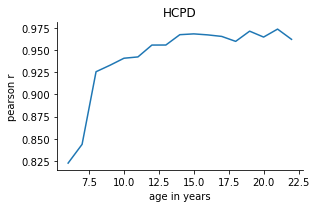

In [12]:
plot_column_by_index(
    data_file=pjoin(anal_dir, 'structure/HCPD_thickness_age-map_map-corr_s1200-avg_R_cole_visual.csv'),
    columns=['s1200_avg'], n_row=1, n_col=1, figsize=(4.5, 3), ylabel='pearson r',
    title='HCPD', legend=False,
    out_file=pjoin(work_dir, 'HCPD_thickness_age-map_map-corr_s1200-avg_R_cole_visual.jpg')
)

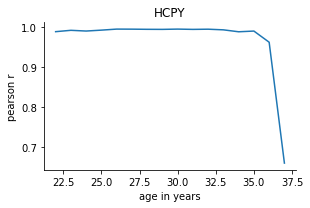

In [16]:
plot_column_by_index(
    data_file=pjoin(anal_dir, 'structure/HCPY_thickness_age-map_map-corr_s1200-avg_R_cole_visual.csv'),
    columns=['s1200_avg'], n_row=1, n_col=1, figsize=(4.5, 3), ylabel='pearson r',
    title='HCPY', legend=False,
    out_file=pjoin(work_dir, 'HCPY_thickness_age-map_map-corr_s1200-avg_R_cole_visual.jpg')
)

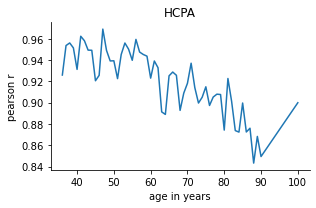

In [17]:
plot_column_by_index(
    data_file=pjoin(anal_dir, 'structure/HCPA_thickness_age-map_map-corr_s1200-avg_R_cole_visual.csv'),
    columns=['s1200_avg'], n_row=1, n_col=1, figsize=(4.5, 3), ylabel='pearson r',
    title='HCPA', legend=False,
    out_file=pjoin(work_dir, 'HCPA_thickness_age-map_map-corr_s1200-avg_R_cole_visual.jpg')
)

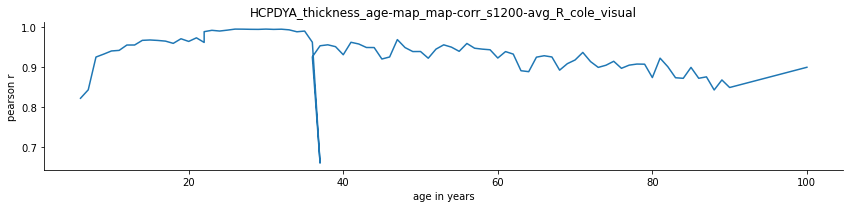

In [28]:
plot_column_by_index(
    data_file=[
        pjoin(anal_dir, 'structure/HCPD_thickness_age-map_map-corr_s1200-avg_R_cole_visual.csv'),
        pjoin(anal_dir, 'structure/HCPY_thickness_age-map_map-corr_s1200-avg_R_cole_visual.csv'),
        pjoin(anal_dir, 'structure/HCPA_thickness_age-map_map-corr_s1200-avg_R_cole_visual.csv')
    ],
    columns=['s1200_avg'], n_row=1, n_col=1, figsize=(12, 3), ylabel='pearson r',
    title='HCPDYA_thickness_age-map_map-corr_s1200-avg_R_cole_visual', legend=False,
    out_file=pjoin(work_dir, 'HCPDYA_thickness_age-map_map-corr_s1200-avg_R_cole_visual.jpg')
)

## myelin age-map map-corr s1200 avg

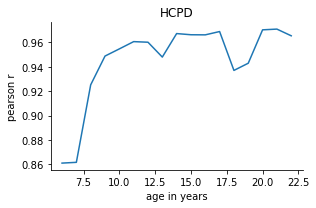

In [18]:
plot_column_by_index(
    data_file=pjoin(anal_dir, 'structure/HCPD_myelin_age-map_map-corr_s1200-avg_R_cole_visual.csv'),
    columns=['s1200_avg'], n_row=1, n_col=1, figsize=(4.5, 3), ylabel='pearson r',
    title='HCPD', legend=False,
    out_file=pjoin(work_dir, 'HCPD_myelin_age-map_map-corr_s1200-avg_R_cole_visual.jpg')
)

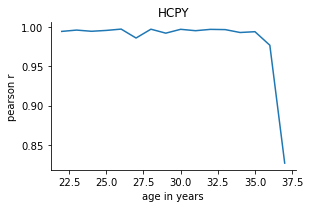

In [19]:
plot_column_by_index(
    data_file=pjoin(anal_dir, 'structure/HCPY_myelin_age-map_map-corr_s1200-avg_R_cole_visual.csv'),
    columns=['s1200_avg'], n_row=1, n_col=1, figsize=(4.5, 3), ylabel='pearson r',
    title='HCPY', legend=False,
    out_file=pjoin(work_dir, 'HCPY_myelin_age-map_map-corr_s1200-avg_R_cole_visual.jpg')
)

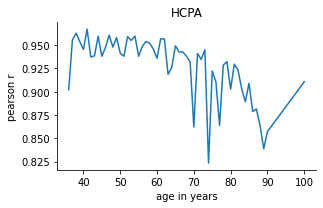

In [20]:
plot_column_by_index(
    data_file=pjoin(anal_dir, 'structure/HCPA_myelin_age-map_map-corr_s1200-avg_R_cole_visual.csv'),
    columns=['s1200_avg'], n_row=1, n_col=1, figsize=(4.5, 3), ylabel='pearson r',
    title='HCPA', legend=False,
    out_file=pjoin(work_dir, 'HCPA_myelin_age-map_map-corr_s1200-avg_R_cole_visual.jpg')
)

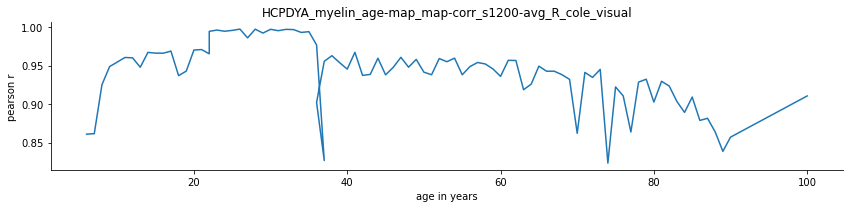

In [33]:
plot_column_by_index(
    data_file=[
        pjoin(anal_dir, 'structure/HCPD_myelin_age-map_map-corr_s1200-avg_R_cole_visual.csv'),
        pjoin(anal_dir, 'structure/HCPY_myelin_age-map_map-corr_s1200-avg_R_cole_visual.csv'),
        pjoin(anal_dir, 'structure/HCPA_myelin_age-map_map-corr_s1200-avg_R_cole_visual.csv')
    ],
    columns=['s1200_avg'], n_row=1, n_col=1, figsize=(12, 3), ylabel='pearson r',
    title='HCPDYA_myelin_age-map_map-corr_s1200-avg_R_cole_visual', legend=False,
    out_file=pjoin(work_dir, 'HCPDYA_myelin_age-map_map-corr_s1200-avg_R_cole_visual.jpg')
)